# 🥂 Title: Is US Wine Better than the rest of the Wine
![Wine Gif](https://media.giphy.com/media/1BXa2alBjrCXC/giphy.gif)

Credit: https://media.giphy.com/media/1BXa2alBjrCXC/giphy.gif

## 🥂 Introduction

Wine is both a popular alcoholic beverage and a robust global industry, with production reaching 260 million hectolitres and 34.3 billion euro in 2021 (International Organization of Vine and Wine, 2022). Of the many factors considered in the wine industry, country of origin (COO) is highly important; production location influences the environmental factors, winemaking technique and market access (Rodrigues et al., 2020, Williamson et al., 2016). This is reflected in wine categorization: countries are grouped into old world versus new world by winemaking history, and traditional versus non-traditional based on scale and contributions to the global wine market (Rodrigues et al., 2020). While these distinctions are designed to help traders and marketers distinguish their products, the question has arisen in the minds of many researchers: is there a relationship between COO and overall product quality?

This idea is well supported by inexperienced consumers and connoisseurs alike, as research has shown that COO was the second most important driving factor that consumers based their wine choices on (Williamson et al., 2016). However, previous research on the subject has been relatively inconclusive. In one study, Croijmans et al., (2020) created classification algorithms that sorted wine based on reviews; they found that while grape variety and wine colour could be accurately predicted, they could not correlate wine quality and COO. In contrast, an analysis of previous literature suggests the COO is indirectly related to wine quality, in that it augments how consumers evaluate wine (Arias-Bolzmann et al., 2003). Currently, the most popular theory is that COO and quality are only correlated where wine knowledge is not robust, and without experience tasting a variety of wine, quality associations are based on country stereotypes (Rodrigues et al., 2020).

This report examines the relationship between COO and rating score. To accurately capture differences across countries, mean value and standard deviation of rating score will be calculated. In calculating mean value, we will account for the difference in availability and wine production across the globe. Additionally, it will help standardize the wine rating system that has been applied (International Organization of Vine and Wine, 2022). By calculating standard deviation, we will accurately capture the variation produced from multiple reviewers. This can help provide a greater picture on wine quality, as wine review is subject to the specializations and opinions of the reviewer and each wine in the dataset was rated by a single reviewer (Croijmans et al., 2020).

winemag-data-130k-v2.csv contains a large subset of reviews collected by WineEnthusiastic. Reviews included were collected prior to November 22nd, 2017. The data collected is fair use and was collected from Kaggle (Zackthoutt, 2017).

## 🥂 Preliminary Results

In [1]:
# Loading Libraries
library(tidyverse)
library(infer)

# Loading Data from the web
wine_review <- read_csv("https://raw.githubusercontent.com/Anmol-Ghadia/Stat-201-group21/main/data/winemag-data-130k-v2.csv",
                        show_col_types=FALSE) |> # hide warning message
                        mutate(id = row) |>      # adding Id column
                        select(-row)             # removing Original Id column
head(wine_review, 4)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,id
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
Italy,"Aromas include tropical fruit, broom, brimstone and dried herb. The palate isn't overly expressive, offering unripened apple, citrus and dried sage alongside brisk acidity.",Vulkà Bianco,87,NA,Sicily & Sardinia,Etna,NA,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,0
Portugal,"This is ripe and fruity, a wine that is smooth while still structured. Firm tannins are filled out with juicy red berry fruits and freshened with acidity. It's already drinkable, although it will certainly be better from 2016.",Avidagos,87,15,Douro,NA,NA,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,1
US,"Tart and snappy, the flavors of lime flesh and rind dominate. Some green pineapple pokes through, with crisp acidity underscoring the flavors. The wine was all stainless-steel fermented.",NA,87,14,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,2
US,"Pineapple rind, lemon pith and orange blossom start off the aromas. The palate is a bit more opulent, with notes of honey-drizzled guava and mango giving way to a slightly astringent, semidry finish.",Reserve Late Harvest,87,13,Michigan,Lake Michigan Shore,NA,Alexander Peartree,NA,St. Julian 2013 Reserve Late Harvest Riesling (Lake Michigan Shore),Riesling,St. Julian,3


Initial examination of the data showed that minimal tidying was necessary. However, we ran all relevant columns through drop_na to filter out entries missing necessary information. 

When processing individual variables, we focused on country, variety, price and points. 

In [2]:
# Wrangling

wine_review <- wine_review |>
               select(country, points, price, variety, id) |> # Deselect unnecessary attributes
               drop_na(country,points, price, variety)        # Remove entries with NA values

head(wine_review)

country,points,price,variety,id
<chr>,<dbl>,<dbl>,<chr>,<dbl>
Portugal,87,15,Portuguese Red,1
US,87,14,Pinot Gris,2
US,87,13,Riesling,3
US,87,65,Pinot Noir,4
Spain,87,15,Tempranillo-Merlot,5
Italy,87,16,Frappato,6


Country was examined to better understand the distribution contained in available reviews, and to determine the best way to categorize the data moving forward. 

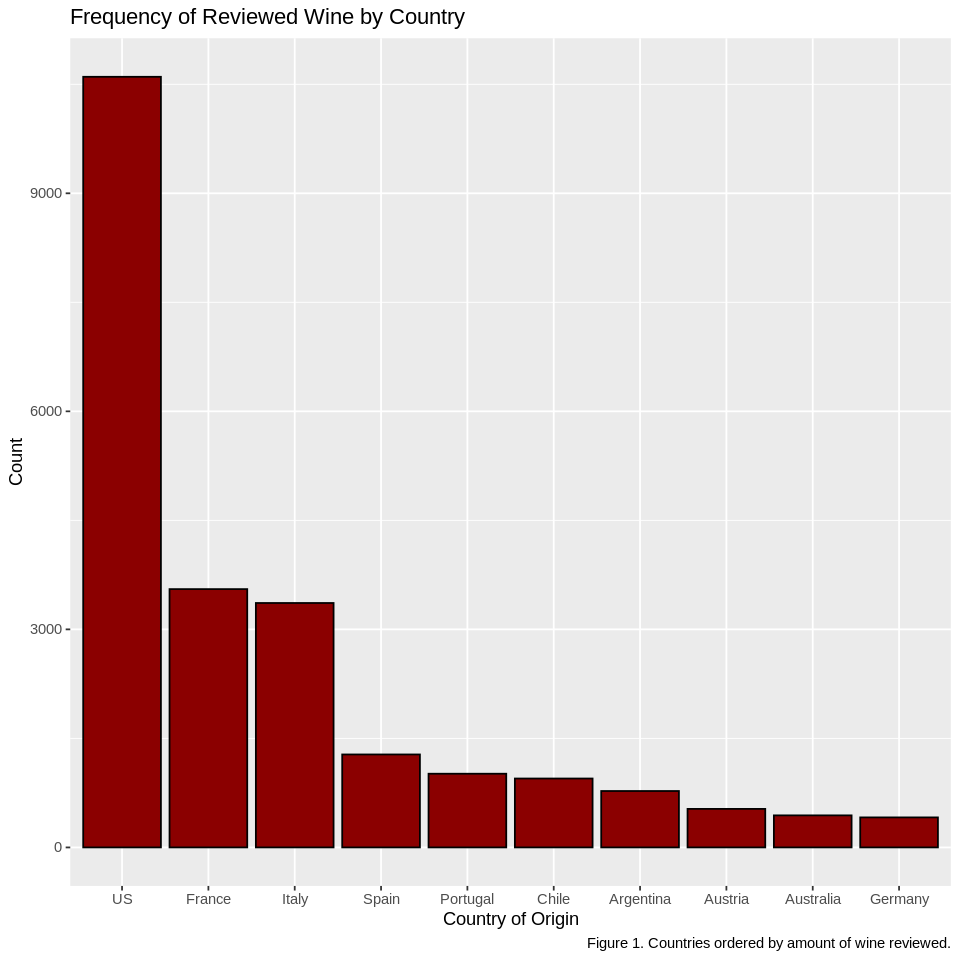

In [3]:
options(repr.plot.width = 8,repr.plot.height = 8)

# Determining frequency of each country within the data

country_frequency <- wine_review |>
                        count(country) |>
                        slice_max(order_by = n, n = 10)

# Maximum of 10 was chosen to highlight greatest producers out of all countries


country_frequency_plot <- ggplot(country_frequency, aes(x = fct_reorder(country, n, .desc = TRUE), y = n)) +
                            geom_bar(stat = "identity", colour = "black", fill = "red4") +
                            labs(x = "Country of Origin", y = "Count",
                                caption = "Figure 1. Countries ordered by amount of wine reviewed.") +
                            ggtitle("Frequency of Reviewed Wine by Country")  

country_frequency_plot


From the visualization above, we can see that the US is the primary reviewed wine by a large margin. This is understandable considering the US is the fourth greatest producer and greatest consumer of wine in the world (International Organization of Vine and Wine, 2022).

To account for the difference in sample size, for the remainder of this report we will be comparing US wine quality to that of the rest of the world. 

In [4]:
# Changing the country attribute to show either US or other only
wine_review$country <- ifelse(wine_review$country == 'US', "US", "Other")

# making country attribute to be of category type
wine_review <- wine_review |>
               mutate(country = as_factor(country))

head(wine_review)

sample_size <- wine_review |>
                group_by(country) |>
                count()

head(sample_size)

country,points,price,variety,id
<fct>,<dbl>,<dbl>,<chr>,<dbl>
Other,87,15,Portuguese Red,1
US,87,14,Pinot Gris,2
US,87,13,Riesling,3
US,87,65,Pinot Noir,4
Other,87,15,Tempranillo-Merlot,5
Other,87,16,Frappato,6


country,n
<fct>,<int>
Other,13370
US,10603


Examining variety, we observed that there were many subclasses, sometimes limited to one or two entries within our data. Additionally, some of these subclasses seemed to be country specific, making them impractical for a global comparison.

A second exploration, using three of the overarching categories (red, white and rosé) yielded varied results, but due to naming conventions, heavily limited the available wine to sample. 

In [5]:
# Examining distribution of wine variety 

variety_dist_max <- wine_review |>
                select(country, variety) |>
                count(variety) |>
                slice_max(order_by = n, n = 10)

variety_dist_min <- wine_review |>
                select(country, variety) |>
                count(variety) |>
                slice_min(order_by = n, n = 10)

variety_dist_max

head(variety_dist_min, 10)

# Looking at categorization of variety with red, white and rosé wine

variety_category <- wine_review |>
                    select(country, variety) |>
                    filter(grepl("white|White|red|Red|rosé|Rosé", variety)) |>
                    count(variety) 
                    
variety_category

variety,n
<chr>,<int>
Pinot Noir,2519
Chardonnay,2139
Cabernet Sauvignon,1886
Red Blend,1663
Bordeaux-style Red Blend,1060
Riesling,1002
Sauvignon Blanc,1001
Syrah,797
Merlot,587


variety,n
<chr>,<int>
Albanello,1
Alvarelhão,1
Aragonez,1
Baga-Touriga Nacional,1
Barbera-Nebbiolo,1
Blauer Portugieser,1
Cabernet Franc-Carmenère,1
Cabernet Moravia,1
Cabernet Sauvignon-Barbera,1


variety,n
<chr>,<int>
Alsace white blend,15
Austrian Red Blend,12
Austrian white blend,8
Bordeaux-style Red Blend,1060
Bordeaux-style White Blend,138
Portuguese Red,458
Portuguese Rosé,2
Portuguese White,209
Provence red blend,11


A final exploration of wine variety and quality showed no real differences in average rating based on variety. As such, to use a larger subset of our data, we will not categorize by variety when examining global wine quality. 

variety,mean_pts,mean_var,count
<chr>,<dbl>,<dbl>,<int>
Alsace white blend,91.46667,9.695238,15
Austrian Red Blend,90.08333,5.174242,12
Austrian white blend,91.25000,2.500000,8
Bordeaux-style Red Blend,88.82736,10.192074,1060
Bordeaux-style White Blend,87.92754,8.622448,138
Portuguese Red,88.63319,9.913294,458
Portuguese Rosé,84.50000,4.500000,2
Portuguese White,86.62201,5.293936,209
Provence red blend,90.90909,5.890909,11


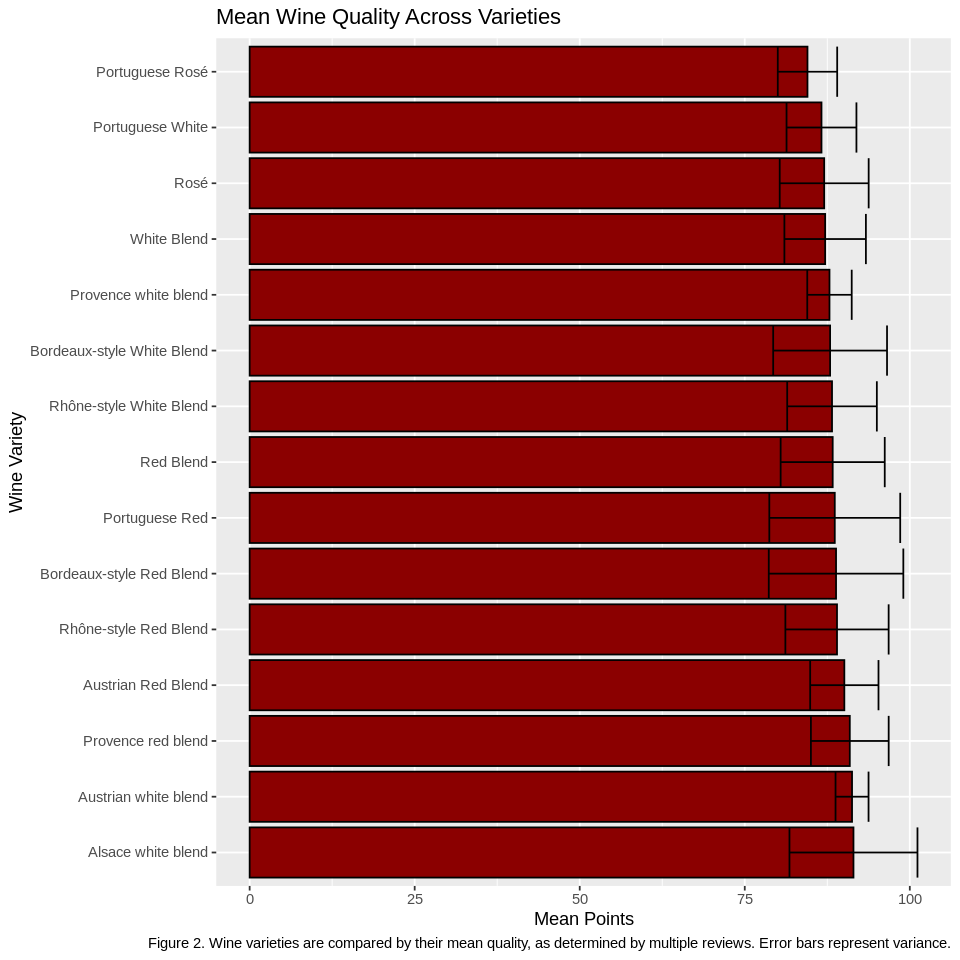

In [6]:
options(repr.plot.width = 8,repr.plot.height = 8)

# Comparing quality across major wine categories, using mean and variance

variety_quality <- wine_review |>
                    select(points, variety) |>
                    filter(grepl("white|White|red|Red|rosé|Rosé", variety)) |>
                    group_by(variety) |>
                    summarize(mean_pts = mean(points),
                                mean_var = var(points),
                                count = n())

variety_quality

variety_quality_plot <- ggplot(variety_quality, aes(x = mean_pts, y = fct_reorder(variety, mean_pts, .desc = TRUE))) + 
                            geom_bar(stat = "identity", colour = "black", fill = "red4") +
                            geom_errorbar(aes(xmin = mean_pts - mean_var, xmax = mean_pts + mean_var)) +
                            labs(x = "Mean Points", y = "Wine Variety", 
                                 caption = "Figure 2. Wine varieties are compared by their mean quality, as determined by multiple reviews. Error bars represent variance.") +
                            ggtitle("Mean Wine Quality Across Varieties")

variety_quality_plot

Explorations of price investigated differences in price between country of origin and whether price could be used as another proxy measure of wine quality. 

country,mean,var,count
<fct>,<dbl>,<dbl>,<int>
Other,33.59372,2529.7399,13370
US,36.49995,623.3328,10603


`summarise()` has grouped output by 'price'. You can override using the
`.groups` argument.


price,country,mean_price,mean_pts,mean_var
<dbl>,<fct>,<dbl>,<dbl>,<dbl>
4,Other,4,85.00000,NA
4,US,4,85.00000,NA
5,Other,5,83.77778,4.1944444
5,US,5,84.66667,0.3333333


price,country,mean_price,mean_pts,mean_var
<dbl>,<fct>,<dbl>,<dbl>,<dbl>
1200,Other,1200,96,NA
1300,Other,1300,96,NA
1900,Other,1900,98,NA
2500,Other,2500,96,NA


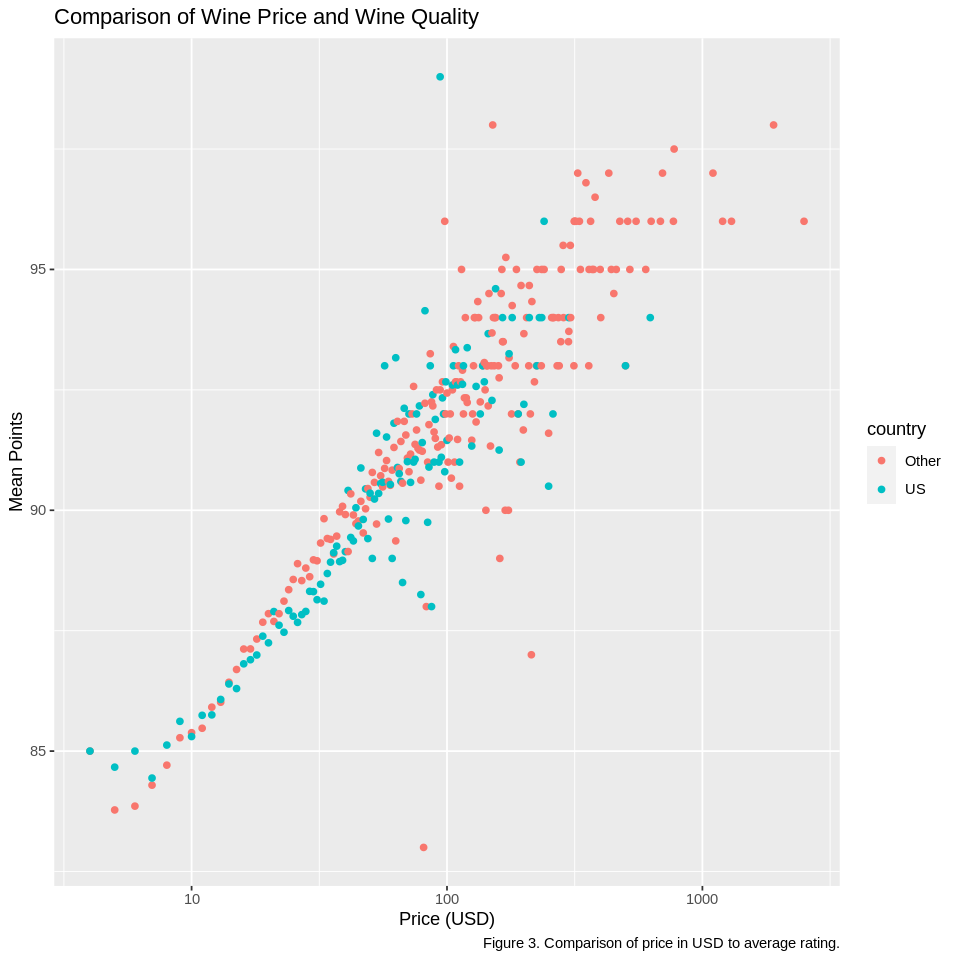

In [7]:
options(repr.plot.width = 8, repr.plot.height = 8)

# Examining distribution of price

price_dist <- wine_review |>
                select(country, price) |>
                group_by(country) |>
                summarize(mean = mean(price),
                          var = var(price),
                          count = n())
                

price_dist

# Examining relationship between quality and price.

price_quality <- wine_review |>
                    select(country, points, price) |>
                    group_by(price, country) |>
                    summarize(mean_price = mean(price),
                                mean_pts = mean(points),
                                mean_var = var(points))

head(price_quality, 4)
tail(price_quality, 4)

price_quality_plot <- ggplot(price_quality, aes(x = mean_price, y = mean_pts, colour = country)) +
                        geom_point() + 
                        labs(x = "Price (USD)", y = "Mean Points", 
                             caption = "Figure 3. Comparison of price in USD to average rating.") +
                        ggtitle("Comparison of Wine Price and Wine Quality") + 
                        scale_x_log10()

price_quality_plot

Our examination of points focused mainly on determining the distribution available across all wine ratings. From the data, wine ratings have a minimum of 80 points, as that is considered the threshhold for good wine (Puckette, n.d).

In [8]:
# Computing basic statistics about the data
points_summary <- wine_review |>
                  summarize(mean = mean(points),
                            var = var(points),
                            n = n())
points_summary

mean,var,n
<dbl>,<dbl>,<int>
88.3627,9.054035,23973


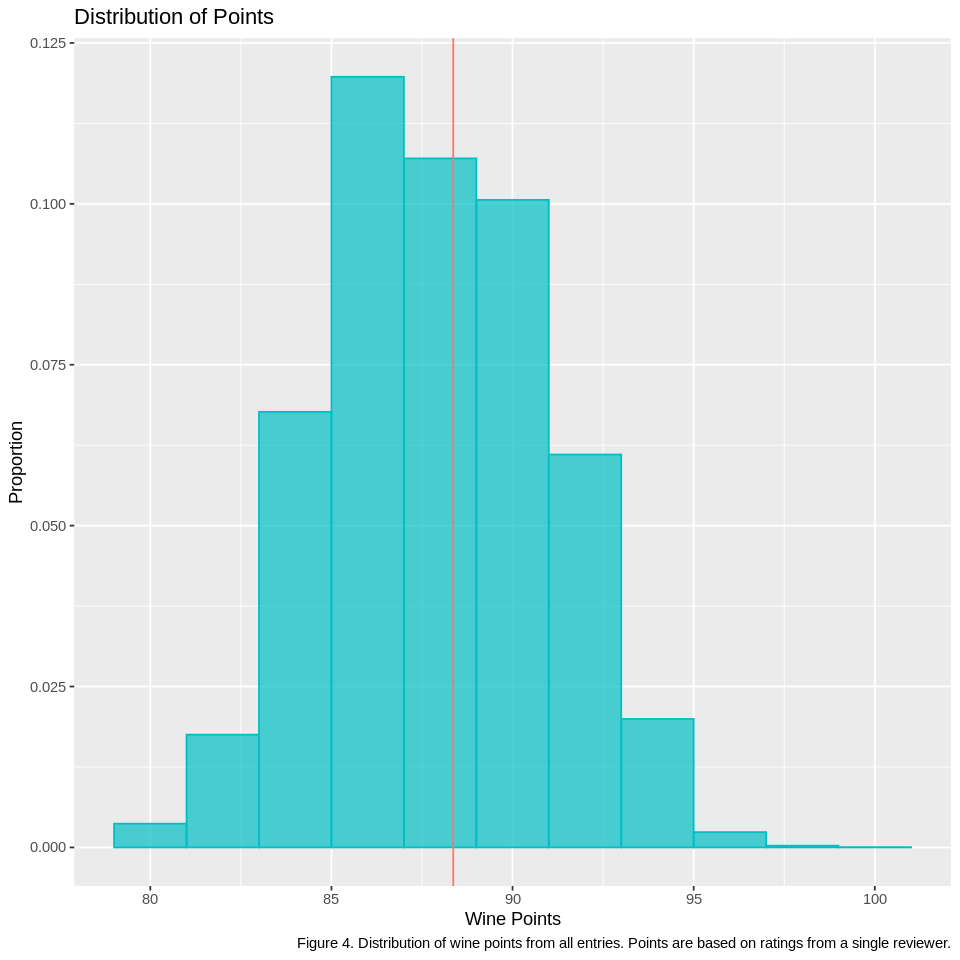

In [9]:
# Visualizing the distribution of points as a histogram
options(repr.plot.width = 8,repr.plot.height = 8)

point_distribution <- wine_review |>
                      ggplot() +
                      geom_histogram(aes(x=points,y=..density..),binwidth = 2,color="#00bfc4",fill="#00bfc4",alpha=0.7) +
                      geom_vline(xintercept=points_summary$mean,color="#f8766d") +
                      labs(x="Wine Points", y="Proportion",
                          caption = "Figure 4. Distribution of wine points from all entries. Points are based on ratings from a single reviewer.") +
                      ggtitle("Distribution of Points")

point_distribution

In [10]:
# computing basic statistics about both groups we are interested in
wine_summary <- wine_review |>
                   group_by(country) |>
                   summarize(mean = mean(points),
                             var = var(points),
                             n = n())
head(wine_summary)

country,mean,var,n
<fct>,<dbl>,<dbl>,<int>
Other,88.22334,8.845024,13370
US,88.53843,9.263072,10603


From our summary analysis, we see little difference in the distribution of points between US and global wine. However, there does seem slightly more variance in points between the two groupings. To thoroughly investigate a difference, further testing of the data will be necessary.

## 🥂 Methods

In this report, we strive to maintain the trustworthiness of our results by using a large and diverse dataset, as well as a standardized wine rating system from a reputable source. 

However, merely presenting plots and estimates is insufficient for stakeholders who may require a more in-depth understanding of the data. To address this gap, we will conduct a hypothesis test and confidence interval to compare the mean rating score between US wines and the rest of the world. We will also compare bootstrapping and asymptotics methods to ensure the validity of our results.

Our Hypothesis:

$H_0: \mu_1 - \mu_2 = 0$

$H_a: \mu_1 - \mu_2 > 0$

Where, $\mu_1$ is the mean points for US wine, and $\mu_2$ is the mean points for all other countries.

We expect to find that US wines do not have a significantly higher rating score than the rest of the world. While the US is ranked within the top five for wine producing countries and the leader in wine consumption, they only account for 3.3 of the 111.6 millions of hectolitres of the wine exported in 2021 (International Organization of Vine and Wine, 2022). This suggests that their wine is not more desired by consumers than other countries. If our findings support this, it could challenge the notion that country of origin has a significant impact on wine quality and future studies may explore other factors that influence wine ratings. On the other hand, if US wines do have a significantly higher rating score, it could have significant implications for the wine industry, particularly for wineries outside the US. 

Let $\mu_1$ be the mean point for US wine, and $\mu_2$ be the mean point for all other countries. We will perform hypothesis testing on $\mu$ at a 10% significance level. Our null hypotehsis is that the difference in mean point rating for wine is the same for US and other countries $\mu_1$ - $\mu_2$ = 0, while the alternate is that US mean wine rating is greater than other countries $\mu_1$ - $\mu_2$ > 0.

### Bootstrap Hypothesis testing

In [11]:
obs_mean_points_diff <- wine_review |>
  specify(formula = points ~ country) |>
  calculate(stat = "diff in means", order = c("US", "Other"))

obs_mean_points_diff

stat
<dbl>
0.3150967


In [12]:
# Shuffling/Permutations using infer

wine_bootstrap_sample <- wine_review |>
    specify(formula = points ~ country) |>
    hypothesize(null = "independence") |> 
    generate(reps = 400, type = "permute") |>    # 400 sets of permutations
    calculate(stat="diff in means", order = c("US", "Other"))    

head(wine_bootstrap_sample)

replicate,stat
<int>,<dbl>
1,0.012563830
2,-0.065901932
3,0.052473140
4,0.029981876
5,-0.001133857
6,0.016284189


Warning message:
“Please be cautious in reporting a p-value of 0. This result is an approximation based on the number of `reps` chosen in the `generate()` step. See `?get_p_value()` for more information.”


p_value
<dbl>
0


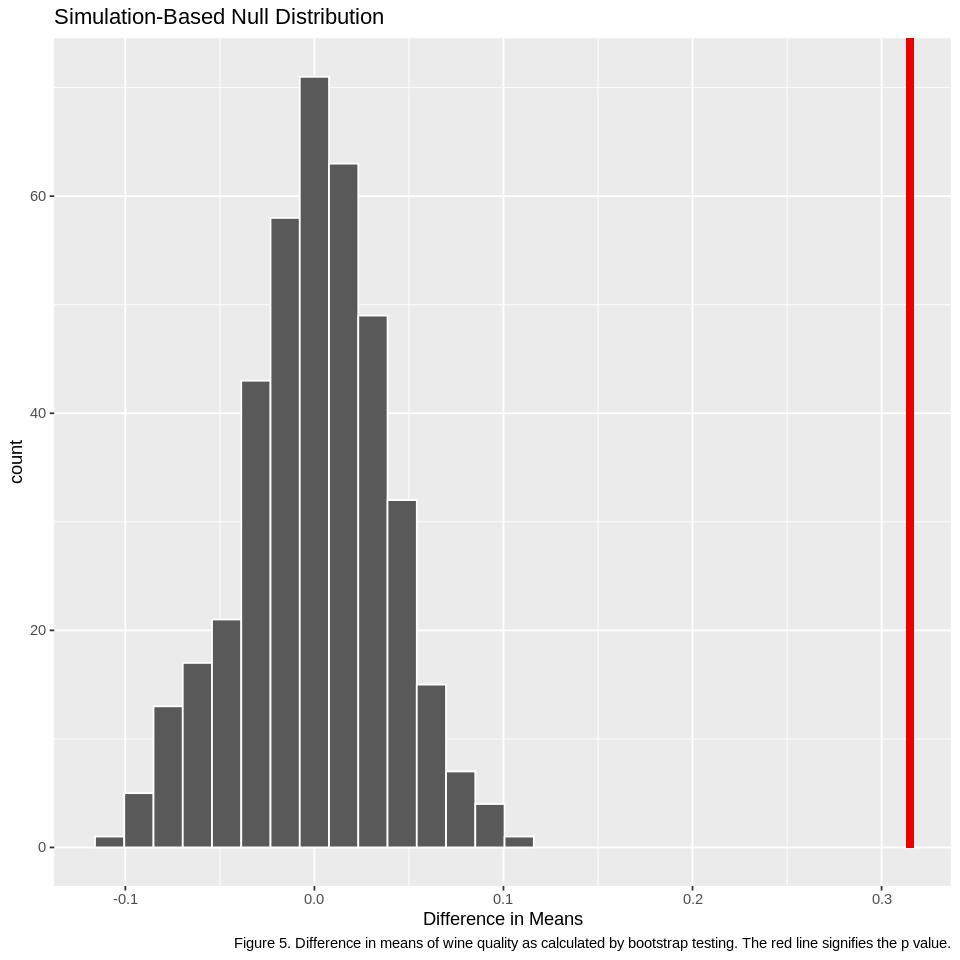

In [13]:
wine_bootstrap_plot <- wine_bootstrap_sample |>
    visualize() +
    shade_p_value(obs_stat = obs_mean_points_diff, direction = "right") +
    xlab("Difference in Means") +
    labs(caption = "Figure 5. Difference in means of wine quality as calculated by bootstrap testing. The red line signifies the p value.")

wine_bootstrap_p_value <- 
    wine_bootstrap_sample |>
    get_p_value(obs_stat = obs_mean_points_diff, direction = "right")

wine_bootstrap_plot
wine_bootstrap_p_value

### Theory-based Hypothesis tests

### $$t = \frac{(\bar{x}_a - \bar{x}_r) - 0}{\sqrt{\frac{s_a^2}{n_a} + \frac{s_r^2}{n_r}}}$$

In [14]:
# Calculating the t-statistic

wine_statistics <- wine_review |>
    select(country,points) |>
    group_by(country) |>
    summarize(
        n = n(),
        mean = mean(points),
        sd = sd(points)
    )

t <- (wine_statistics$mean[2] - wine_statistics$mean[1])/ sqrt(wine_statistics$sd[2]^2/wine_statistics$n[2] + wine_statistics$sd[1]^2/wine_statistics$n[1])

wine_statistics
t

country,n,mean,sd
<fct>,<int>,<dbl>,<dbl>
Other,13370,88.22334,2.974058
US,10603,88.53843,3.043530


[1] 8.041989

In [15]:
wine_theory_sample <- 
    wine_review |>
    specify(formula = points ~ country) |>
    hypothesize(null = "independence") |>
    generate(reps = 400, type = "permute") |>    # 400 sets of permutations
    calculate(stat="t", order = c("US", "Other"))    

head(wine_theory_sample)

replicate,stat
<int>,<dbl>
1,-0.28811992
2,0.06186299
3,0.77946269
4,-0.80774600
5,-0.87494370
6,-0.43515271


Warning message:
“Check to make sure the conditions have been met for the theoretical method. {infer} currently does not check these for you.”


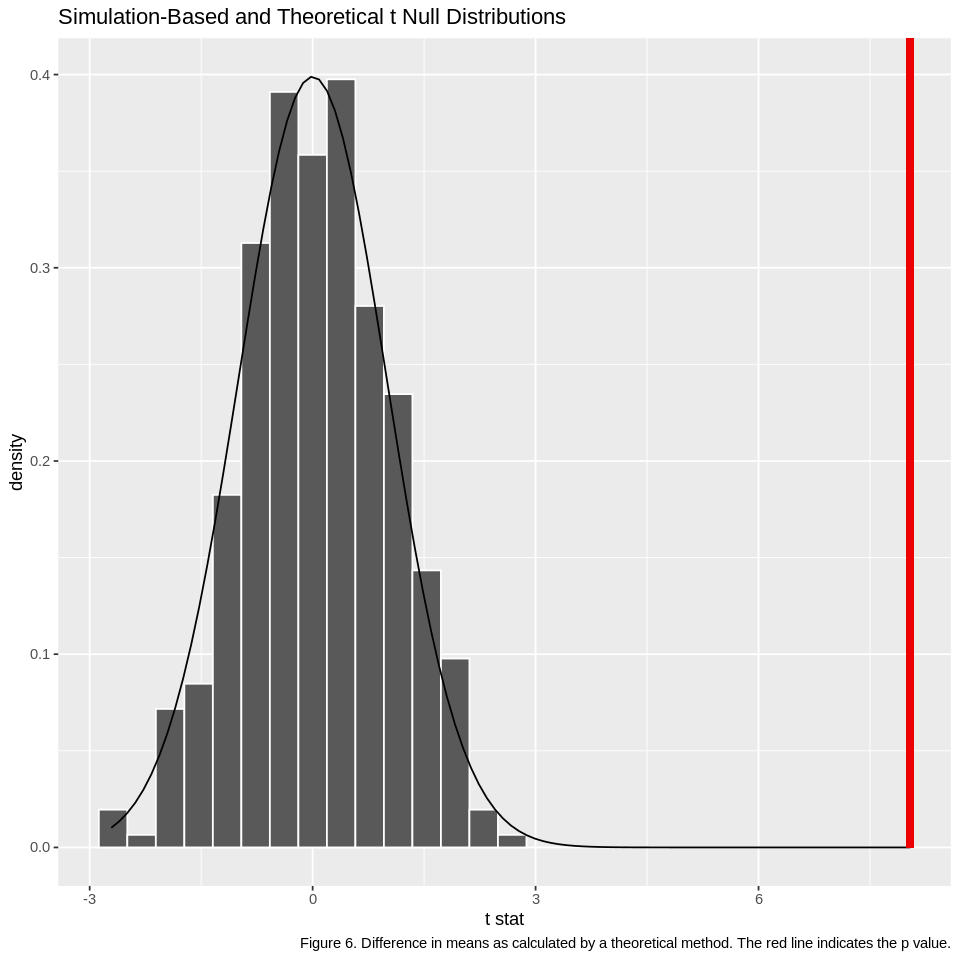

In [16]:
visualize(wine_theory_sample,method="both") +
  shade_p_value(obs_stat = t, direction = "right") +
  labs(caption = "Figure 6. Difference in means as calculated by a theoretical method. The red line indicates the p value.")

In [17]:
get_p_value(wine_theory_sample, obs_stat = t, direction = "right")

Warning message:
“Please be cautious in reporting a p-value of 0. This result is an approximation based on the number of `reps` chosen in the `generate()` step. See `?get_p_value()` for more information.”


p_value
<dbl>
0


## 🥂 Results

A hypothesis test was conducted to determine the difference in means of wine review scores between wine produced within the US and other countries. Simulation based bootstrapping was used with 1000 replicates to observe the difference in means through the category of points and country. Through the replicates, the difference in means plot and p-value have also been calculated. 

Through the analysis, we have found that the p-value = 0. A zero p-value has occurred as the result of get_p_value() which has given an approximation. This is due to the observed statistic to be very unlikely under the null hypothesis and the resulting approximation of the p-value must be very small and will be reported as p-value < 0.01. 

With bootstrapping resulting in a p-value < 0.01, the theoretical approach can also be applied to cross reference. The results of the theoretical method with 400 replicates also resulted in the p-value < 0.01 and  t = 8.042. With the p-value < 0.01 we reject the null hypothesis.

While both methods provided similar results, the bootstrapping method is preferred due to the abnormal shape of the data. The same result was produced as the sample size is large to allow it to converge close enough to represent the population distribution close to normal. For the case of large sample sizes, asymptotic approximation may be preferred, but bootstrapping may be more appropriate due to having no assumptions required about the population distribution. 

With a resulting p-value < 0.01, the observed difference in means is highly significant, and we will reject the null hypothesis. This supports the case that the alternate hypothesis is true and very likely as the alternate hypothesis states, µ1 - µ2 > 0, US mean wine rating is greater than other countries. 

## 🥂 Discussion

The aim of the study was to investigate a possible relationship between COO and wine quality; quality was compared using independent wine rating scores for US and global wine. Region scores were computed by calculating the mean of all ratings. The difference in means was then calculated to produce a summary. 

Data analysis, using both bootstrapping and theoretical methods suggested a significant difference in means, leading to a rejection of the null hypothesis. This result indicates a marked increase in quality as judged by wine reviews for US wine over global competitors. 

The implications of this study could influence both domestic wine consumption and foreign advertising strategy for the US. Research by Williamson et al. (2016) suggests that COO and reputation are important factors for wine choice, regardless of consumer experience and involvement in the wine industry. Additionally, they found that statements about the quality of the wine and country were more influential in purchase rate than taste. 

As of 2021, the US imports the second highest amount of wine, exceeded only by Germany. Additionally, they have relatively low exports compared to other major wine producers of the world (International Organization of Vine and Wine, 2022). By marketing their wine as notably higher quality, this could allow them access to foreign markets that rely on wine imports to meet their consumption rates, such as Germany and China (International Organization of Vine and Wine, 2022).

These results are somewhat consistent with the findings of previous literature. Rodrigues et al. (2020) found that COO positively affected wine ratings if there were already strong associations between the country and wine production. With the US being fourth in the world for wine production and the industry growing over 6% between 2020 and 2021, it is one of the most established new world, traditional winemakers, and would likely have strong associations for each reviewer (International Organization of Vine and Wine, 2022; Rodrigues et al., 2020). Additional research by Fischer & Frewer (2009) on food benefit perception noted that when foods are familiar, most of the benefit analysis comes from prior associations we have. In comparing the US against the rest of the globe, wines produced by the US will be largely familiar to most reviewers, regardless of their specialties, whereas wines from other, less relevant countries may be subject to strict judgment as reviewers formulate first impressions. As we grouped all wines outside of the US together, the overall difference could be attributed to the wide range of individual countries. However, wine quality has long been suggested to be highly subjective, and previous reports have found no overarching difference in quality from COO (Croijmans et al., 2020).

For future studies, two main areas of exploration come from diversifying the data pool. In our sample, the US was the most represented, and outstripped many of the other countries, leading to us grouping all wines together. In the future, a more diverse pool of wines from each country may help determine smaller nuances between COO, as opposed to solely examining the US reputation of quality. A second interest is possible blind tasting; Croijmans et al., (2020) noted that there was no consistent way to distinguish COO from wine reviews when sorting with a classifier. This suggests that marked differences in quality come down to assumptions. By having reviewers blind to the region for initial ratings, it could determine whether the bias is due to association or qualities within the wine. 


## 🥂 References

Arias‐Bolzmann, L., Sak, O., Musalem, A., Lodish, L., Báez K., R., & José De Sousa, L. (2003). Wine pricing: The influence of country of origin, Variety, and Wine Magazine ratings. International Journal of Wine Marketing, 15(2), 47–57. https://doi.org/10.1108/eb008756 

Croijmans, I., Hendrickx, I., Lefever, E., Majid, A., & Van Den Bosch, A. (2020). Uncovering the language of wine experts. Natural Language Engineering, 26(5), 511-530. doi:10.1017/S1351324919000500

Fischer, A. R. H., & Frewer, L. J. (2009). Consumer familiarity with foods and the perception of risks and benefits. Food Quality and Preference, 20(8), 576–585. https://doi.org/10.1016/j.foodqual.2009.06.008 

International Organization of Vine and Wine. (2019) 2019 Statistical Report on World Vitiviniculture.

International Organization of Vine and Wine. (2022) State of the World Vine and Wine Sector 2021.

Puckette, M. (n.d.). How wine ratings work. Wine Folly. Retrieved April 13, 2023, from https://winefolly.com/tips/wine-ratings-explained/ 

Rodrigues, H., Rolaz, J., Franco-Luesma, E., Sáenz-Navajas, M.-P., Behrens, J., Valentin, D., & Depetris-Chauvin, N. (2020). How the country-of-origin impacts wine traders’ mental representation about wines: A study in a world wine trade fair. Food Research International, 137, 109480. https://doi.org/10.1016/j.foodres.2020.109480 

Williamson, P. O., Lockshin, L., Francis, I. L., & Mueller Loose, S. (2016). Influencing consumer choice: Short and Medium Term Effect of country of origin information on wine choice. Food Quality and Preference, 51, 89–99. https://doi.org/10.1016/j.foodqual.2016.02.018 

Zackthoutt. (2017, November 24). Wine Reviews. Retrieved March 8, 2023, from https://www.kaggle.com/datasets/zynicide/wine-reviews. 

